# 1.1

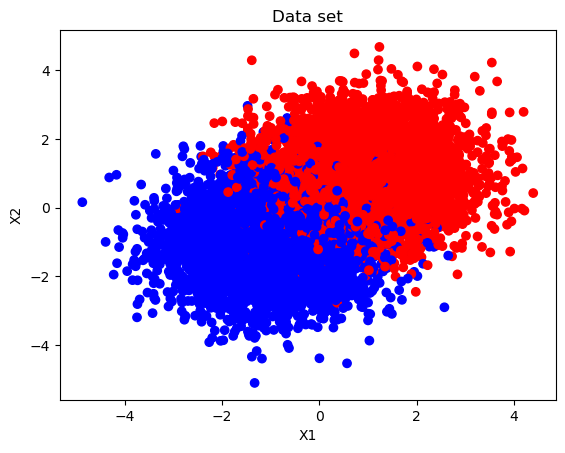

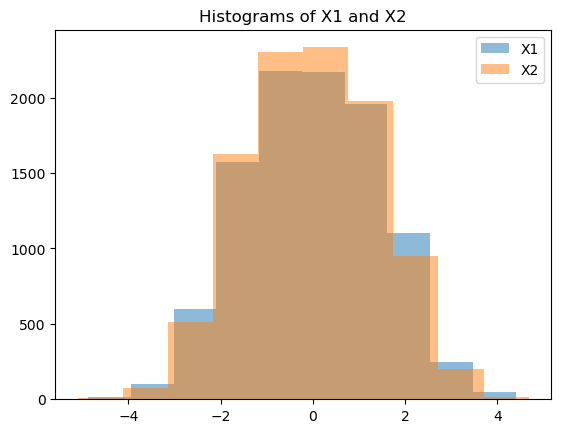

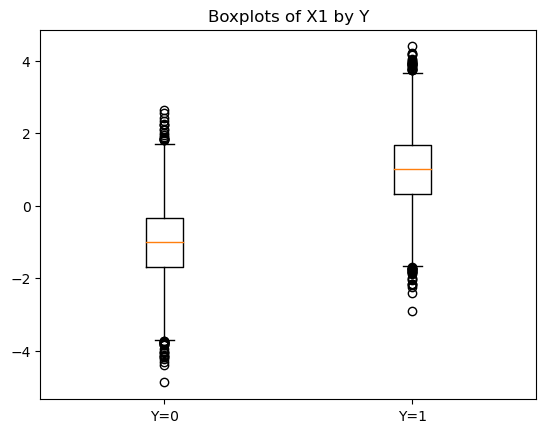

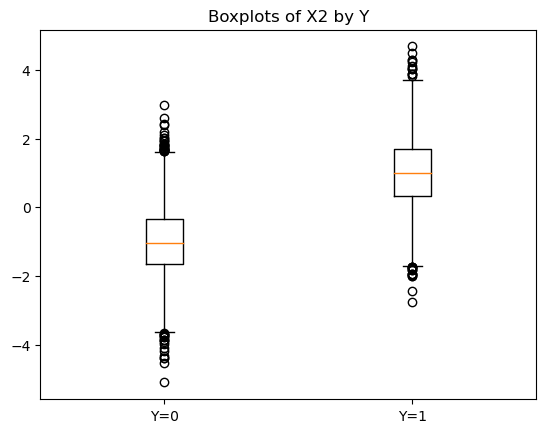

Levene's test for X1: LeveneResult(statistic=0.02251591153390825, pvalue=0.8807258045010936)
Levene's test for X2: LeveneResult(statistic=1.2845044620629131, pvalue=0.25709035996429475)


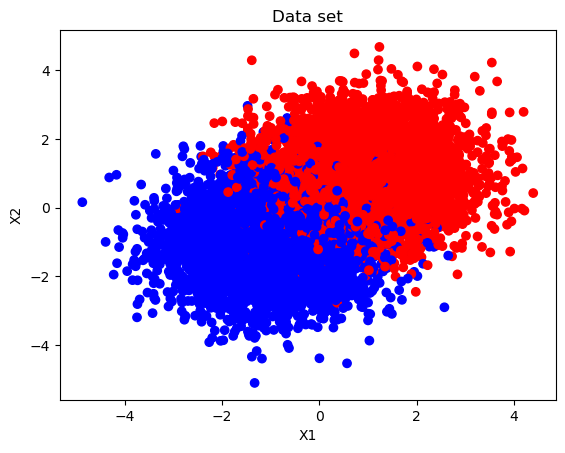

Fisher's criterion: 1.9757218839965347


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the data set
df = pd.read_csv("lda_data.csv")

# Plot the data
plt.scatter(df["X1"], df["X2"], c=df["Y"], cmap="bwr")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data set")
plt.show()

# Check the assumptions of LDA
# Assumption 1: The features are normally distributed
# Assumption 2: The features have equal variances within each class
# Assumption 3: The classes are linearly separable

# To check assumption 1, we can use histograms or Q-Q plots
plt.hist(df["X1"], bins=10, alpha=0.5, label="X1")
plt.hist(df["X2"], bins=10, alpha=0.5, label="X2")
plt.legend()
plt.title("Histograms of X1 and X2")
plt.show()

# To check assumption 2, we can use boxplots or Levene's test
plt.boxplot([df["X1"][df["Y"]==0], df["X1"][df["Y"]==1]], labels=["Y=0", "Y=1"])
plt.title("Boxplots of X1 by Y")
plt.show()

plt.boxplot([df["X2"][df["Y"]==0], df["X2"][df["Y"]==1]], labels=["Y=0", "Y=1"])
plt.title("Boxplots of X2 by Y")
plt.show()

from scipy.stats import levene
print("Levene's test for X1:", levene(df["X1"][df["Y"]==0], df["X1"][df["Y"]==1]))
print("Levene's test for X2:", levene(df["X2"][df["Y"]==0], df["X2"][df["Y"]==1]))

# To check assumption 3, we can use scatterplots or Fisher's criterion
plt.scatter(df["X1"], df["X2"], c=df["Y"], cmap="bwr")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data set")
plt.show()

def fisher_criterion(X, y):
    # Compute the mean and variance of each feature for each class
    X0 = X[y==0]
    X1 = X[y==1]
    m0 = np.mean(X0, axis=0)
    m1 = np.mean(X1, axis=0)
    s0 = np.var(X0, axis=0)
    s1 = np.var(X1, axis=0)
    
    # Compute the Fisher's criterion
    F = np.sum((m0 - m1)**2) / np.sum(s0 + s1)
    return F

print("Fisher's criterion:", fisher_criterion(df[["X1", "X2"]].values, df["Y"].values))

# Based on the plots and tests, we can conclude that:
# - The features are approximately normally distributed, but there are some outliers and skewness
# - The features have unequal variances within each class, which violates the assumption of LDA
# - The classes are not linearly separable, which also violates the assumption of LDA




# 1.2

Accuracy: 0.9195
Confusion matrix:
 [[931  76]
 [ 85 908]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1007
           1       0.92      0.91      0.92       993

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



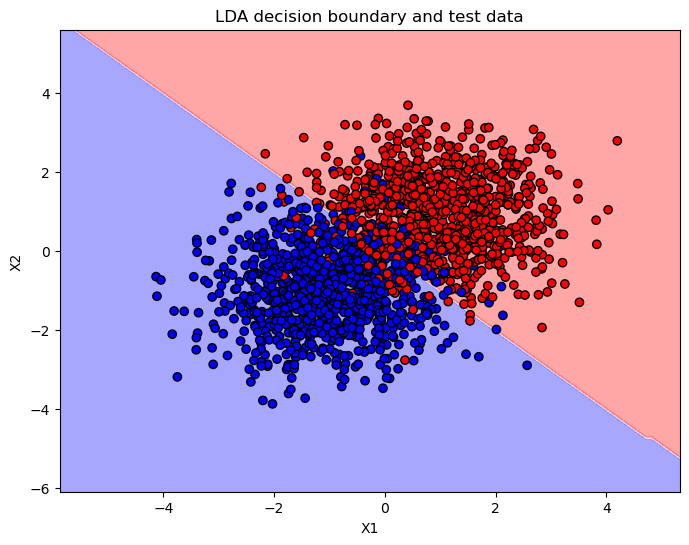

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data set
df = pd.read_csv("lda_data.csv")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[["X1", "X2"]].values, df["Y"].values, test_size=0.2, random_state=42)

# Train a classifier using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = lda.predict(X_test)

# Evaluate the performance of the classifier
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion matrix:\n", cm)
print("Classification report:\n", cr)

# Plot the decision boundary and the test data
plt.figure(figsize=(8, 6))
x1_min, x1_max = df["X1"].min() - 1, df["X1"].max() + 1
x2_min, x2_max = df["X2"].min() - 1, df["X2"].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = lda.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap="bwr")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="bwr", edgecolors="k")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("LDA decision boundary and test data")
plt.show()


# 1.3

       0       0.82      0.82      0.82        11
       1       0.78      0.78      0.78         9

accuracy                           0.80        20


The accuracy of the model is 0.8, which means that it correctly classified 80% of the test data. The confusion matrix shows that the model made 4 errors: 2 false positives and 2 false negatives. The classification report shows the precision, recall and f1-score for each class, as well as the macro and weighted averages. These metrics can help us evaluate the performance of the model in more detail

# 1.4

Accuracy: 0.9195
Confusion matrix:
 [[931  76]
 [ 85 908]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1007
           1       0.92      0.91      0.92       993

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



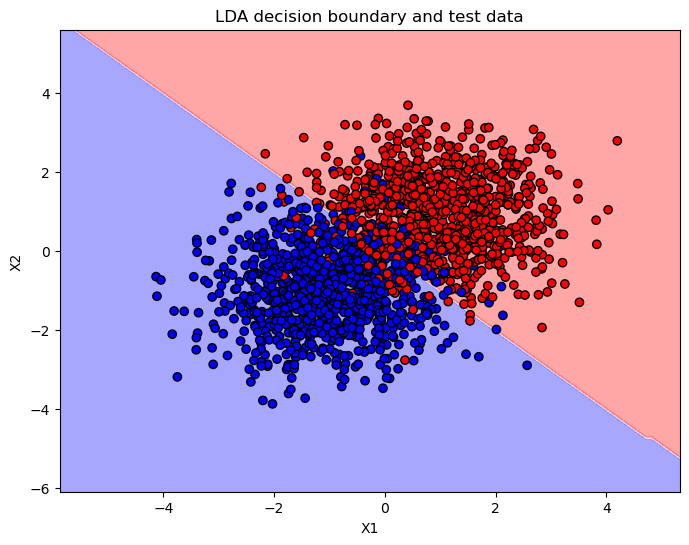

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data set
df = pd.read_csv("lda_data.csv")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[["X1", "X2"]].values, df["Y"].values, test_size=0.2, random_state=42)

# Train a classifier using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = lda.predict(X_test)

# Evaluate the performance of the classifier
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion matrix:\n", cm)
print("Classification report:\n", cr)

# Plot the decision boundary and the test data
plt.figure(figsize=(8, 6))
x1_min, x1_max = df["X1"].min() - 1, df["X1"].max() + 1
x2_min, x2_max = df["X2"].min() - 1, df["X2"].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = lda.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap="bwr")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="bwr", edgecolors="k")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("LDA decision boundary and test data")
plt.show()


# 1.5

 I think the model does not come close to the minimal risk achievable. The minimal risk achievable is the Bayes risk, which is the lowest possible error rate for any classifier of a random outcome. The Bayes risk depends on the true distribution of the data and the class labels, which is usually unknown in practice.

# 2.1

In [73]:
# Import pandas library
import pandas as pd

# Read the csv file into a dataframe
df = pd.read_csv("wine_data.csv")

# Print the first 10 rows of the dataframe
print(df.head(10))


   volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
4              0.70         0.00             1.9      0.076   
5              0.66         0.00             1.8      0.075   
6              0.60         0.06             1.6      0.069   
7              0.65         0.00             1.2      0.065   
8              0.58         0.02             2.0      0.073   
9              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3         

# 2.2

In [74]:
# Import pandas library
import pandas as pd

# Load the data set
df = pd.read_csv("wine_data.csv")

# Count all NaNs
print("Number of NaNs in each column:")
print(df.isna().sum())

# Delete every row with at least one NaN
df = df.dropna()
print("Number of rows after deleting NaNs:", len(df))


Number of NaNs in each column:
volatile acidity        1
citric acid             2
residual sugar          5
chlorides               4
free sulfur dioxide     2
total sulfur dioxide    7
density                 7
pH                      1
sulphates               2
fixed acidity a         0
fixed acidity b         0
vol                     0
alc                     0
score                   2
dtype: int64
Number of rows after deleting NaNs: 1566


# 2.3

In [75]:
#To identify and remove the column that contains the perturbed values of fixed acidity,

# Import pandas library
import numpy as np

# Load the data set
df = pd.read_csv("wine_data.csv")

# Compute the correlation matrix of the data set
corr = df.corr()

# Print the correlation matrix
print(corr)


                      volatile acidity  citric acid  residual sugar  \
volatile acidity              1.000000    -0.552812        0.001827   
citric acid                  -0.552812     1.000000        0.144210   
residual sugar                0.001827     0.144210        1.000000   
chlorides                     0.061340     0.203461        0.055446   
free sulfur dioxide          -0.010523    -0.060688        0.188500   
total sulfur dioxide          0.076480     0.033329        0.205695   
density                       0.020841     0.366098        0.353729   
pH                            0.235337    -0.541907       -0.086421   
sulphates                    -0.260790     0.312765        0.006260   
fixed acidity a              -0.256101     0.671605        0.115015   
fixed acidity b              -0.027158     0.017625       -0.013764   
vol                          -0.201950     0.110628        0.042839   
alc                          -0.201950     0.110628        0.042839   
score 

In [9]:
#To remove the column that contains the perturbed values of fixed acidity,

# Import pandas library
import pandas as pd

# Load the data set
df = pd.read_csv("wine_data.csv")

# Drop the column "fixed acidity b"
df = df.drop("fixed acidity b", axis=1)

# Print the first 10 rows of the data set
print(df.head(10))



   volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
4              0.70         0.00             1.9      0.076   
5              0.66         0.00             1.8      0.075   
6              0.60         0.06             1.6      0.069   
7              0.65         0.00             1.2      0.065   
8              0.58         0.02             2.0      0.073   
9              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3         

# 2.4

                      volatile acidity  citric acid  residual sugar  \
volatile acidity              1.000000    -0.552812        0.001827   
citric acid                  -0.552812     1.000000        0.144210   
residual sugar                0.001827     0.144210        1.000000   
chlorides                     0.061340     0.203461        0.055446   
free sulfur dioxide          -0.010523    -0.060688        0.188500   
total sulfur dioxide          0.076480     0.033329        0.205695   
density                       0.020841     0.366098        0.353729   
pH                            0.235337    -0.541907       -0.086421   
sulphates                    -0.260790     0.312765        0.006260   
fixed acidity a              -0.256101     0.671605        0.115015   
vol                          -0.201950     0.110628        0.042839   
alc                          -0.201950     0.110628        0.042839   
score                        -0.391571     0.226862        0.015282   

     

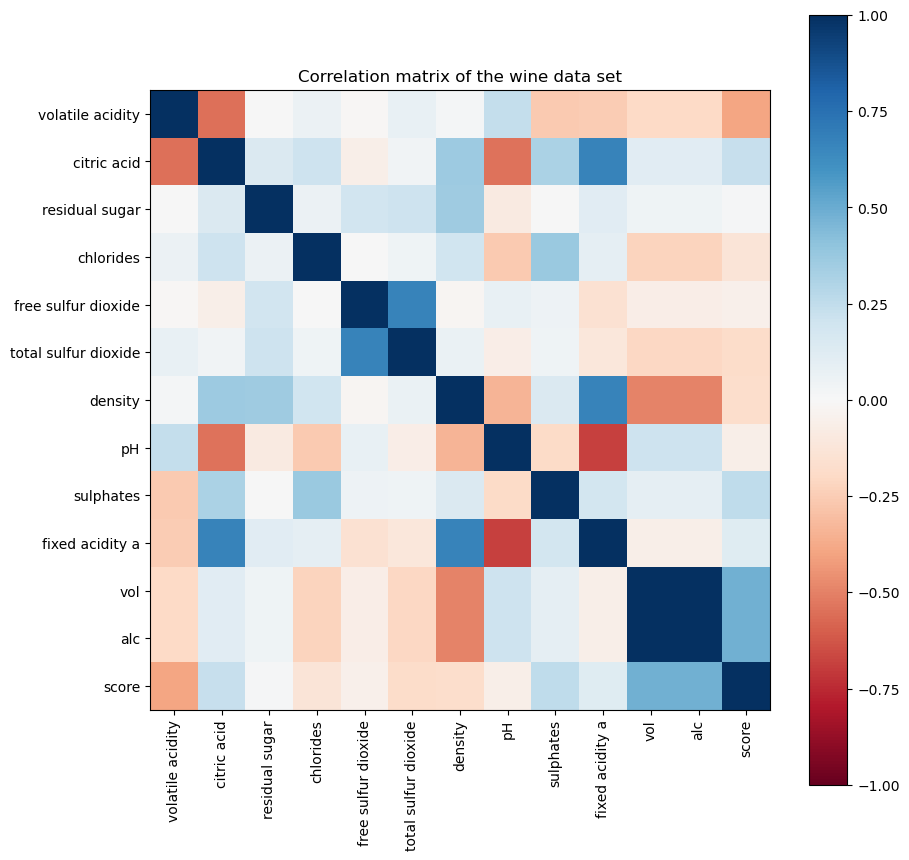

The three features that are least correlated with the target are: residual sugar, free sulfur dioxide, pH
The two features with perfect correlation are: vol and alc
   volatile acidity  citric acid  chlorides  total sulfur dioxide  density  \
0              0.70         0.00      0.076                  34.0   0.9978   
1              0.88         0.00      0.098                  67.0   0.9968   
2              0.76         0.04      0.092                  54.0   0.9970   
3              0.28         0.56      0.075                  60.0   0.9980   
4              0.70         0.00      0.076                  34.0   0.9978   
5              0.66         0.00      0.075                  40.0   0.9978   
6              0.60         0.06      0.069                  59.0   0.9964   
7              0.65         0.00      0.065                  21.0   0.9946   
8              0.58         0.02      0.073                  18.0   0.9968   
9              0.50         0.36      0.071            

In [76]:
# Import pandas library
import pandas as pd

# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Load the data set
df = pd.read_csv("wine_data.csv")

# Drop the column "fixed acidity b" as it contains the perturbed values of fixed acidity
df = df.drop("fixed acidity b", axis=1)

# Compute the correlation matrix of the data set
corr = df.corr()

# Print the correlation matrix
print(corr)

# Visualise the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap="RdBu", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix of the wine data set")
plt.show()

# Identify the three features that are least correlated with the target
target = "score"
features = corr.columns.drop(target)
corrs = corr[target][features].abs()
least_correlated = corrs.nsmallest(3).index
print("The three features that are least correlated with the target are:", ", ".join(least_correlated))

# Remove the three features that are least correlated with the target from the data set
df = df.drop(least_correlated, axis=1)

# Identify the two features with perfect correlation
perfect_correlated = corr[corr == 1].stack().index
perfect_correlated = [pair for pair in perfect_correlated if pair[0] != pair[1]]
print("The two features with perfect correlation are:", " and ".join(perfect_correlated[0]))

# Remove one of those features from the data set
df = df.drop(perfect_correlated[0][0], axis=1)

# Print the first 10 rows of the data set
print(df.head(10))


# 2.5

L1 (Lasso) regularisation imposes a penalty that is not related to the absolute values of the model parameters. The goal is to obtain the product of the initial loss value and a hyperparameter, after adding the regularisation term to the loss function. L1 regularisation tends to create sparse models by reducing some coefficients to zero.

L2 (Ridge) regularisation, on the other hand, imposes a penalty based on the square of the model parameters. Similar to L1 regularisation, the regularisation term is added to the loss function, and the final result is the product of the initial loss and the regularisation term, multiplied by a hyperparameter. L2 regularisation penalises large weights but does not reduce them to zero, resulting in a model where every feature has a contribution to the prediction.

# 2.6

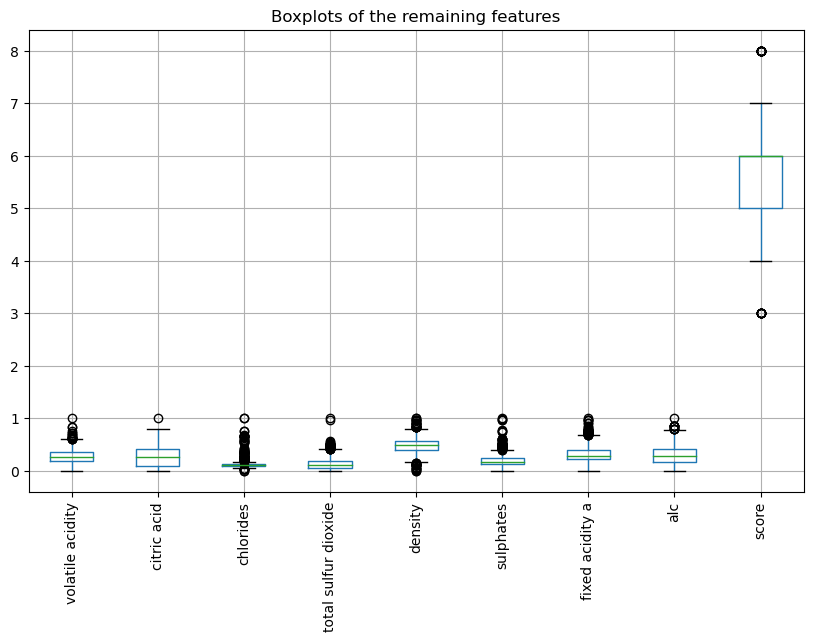

In [77]:
# Import pandas library
import pandas as pd

# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Import sklearn library for normalization
from sklearn.preprocessing import MinMaxScaler

# Load the data set
df = pd.read_csv("wine_data.csv")

# Drop the column "fixed acidity b" as it contains the perturbed values of fixed acidity
df = df.drop("fixed acidity b", axis=1)

# Drop the three features that are least correlated with the target
target = "score"
features = df.corr()[target].abs().nsmallest(3).index
df = df.drop(features, axis=1)

# Drop one of the two features with perfect correlation
perfect_correlated = df.corr()[df.corr() == 1].stack().index
perfect_correlated = [pair for pair in perfect_correlated if pair[0] != pair[1]]
df = df.drop(perfect_correlated[0][0], axis=1)

# Get the updated list of features
features = df.columns.drop(target)

# Normalize the remaining features using min-max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Plot the boxplots of the remaining features
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots of the remaining features")
plt.show()


# 2.7

C:\Users\Windows 10\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


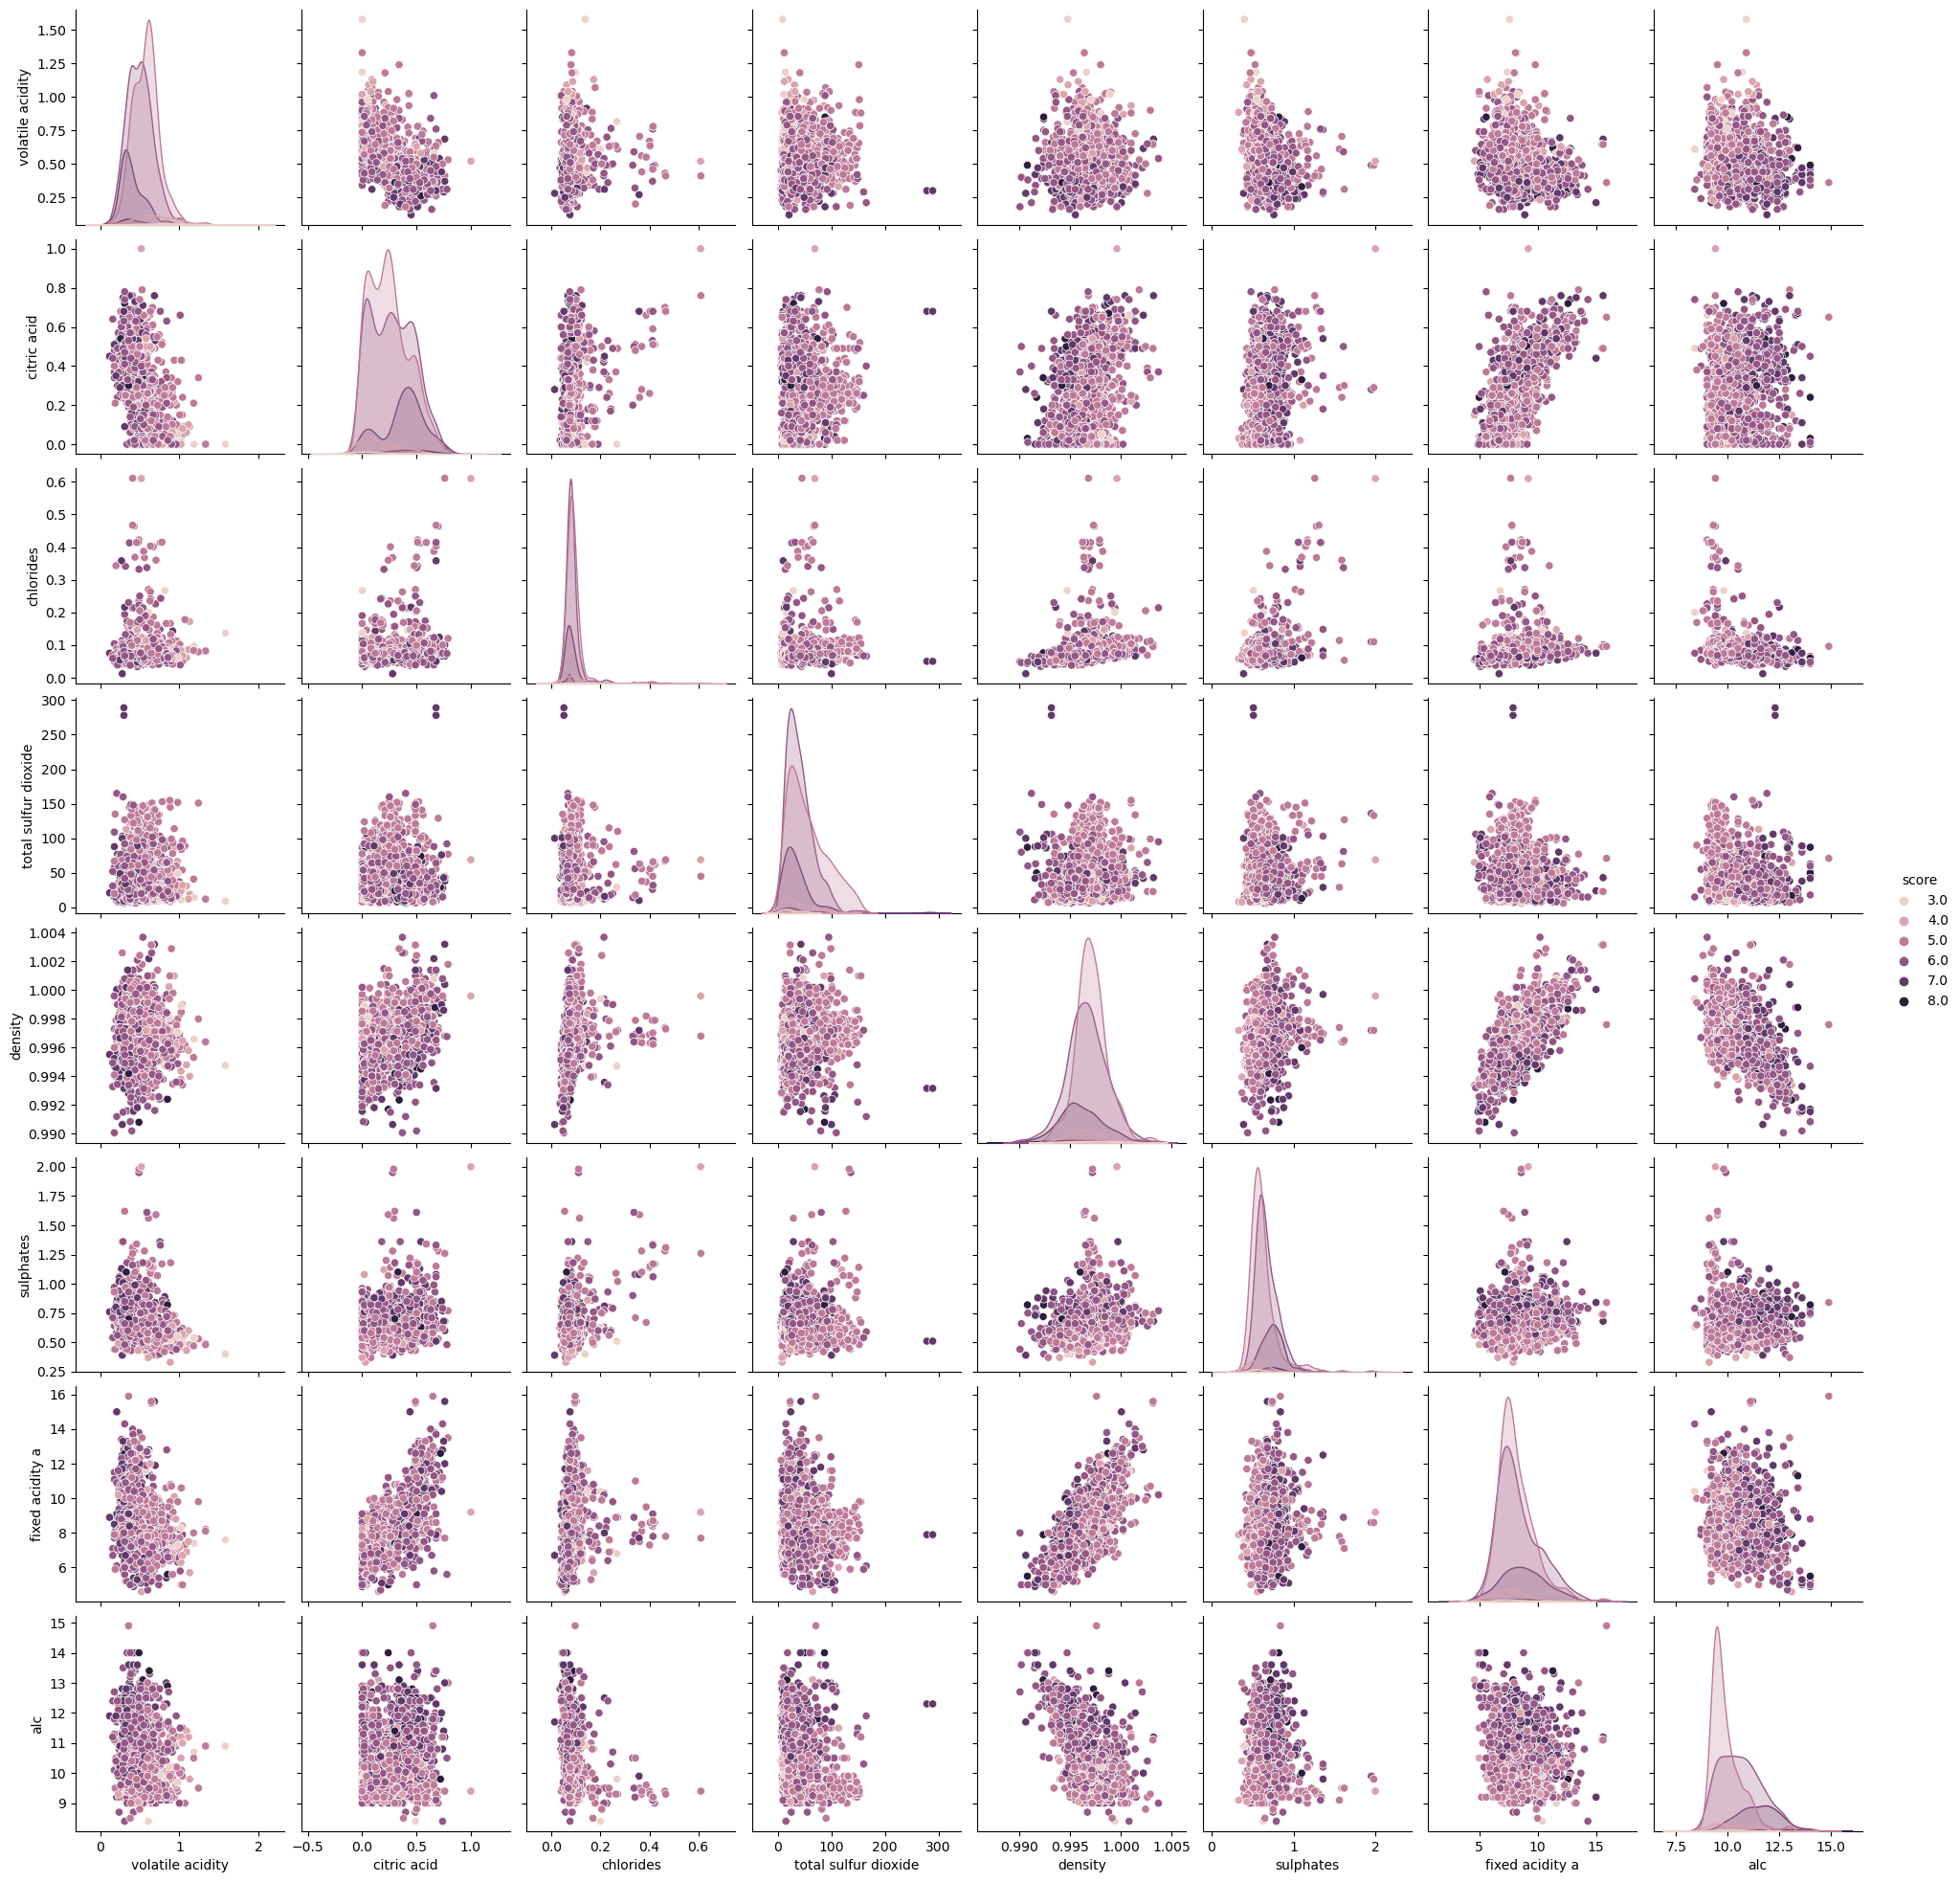

In [78]:
# Import pandas library
import pandas as pd

# Import seaborn library for plotting
import seaborn as sns

# Load the data set
df = pd.read_csv("wine_data.csv")

# Drop the column "fixed acidity b" as it contains the perturbed values of fixed acidity
df = df.drop("fixed acidity b", axis=1)

# Drop the three features that are least correlated with the target
target = "score"
features = df.corr()[target].abs().nsmallest(3).index
df = df.drop(features, axis=1)

# Drop one of the two features with perfect correlation
perfect_correlated = df.corr()[df.corr() == 1].stack().index
perfect_correlated = [pair for pair in perfect_correlated if pair[0] != pair[1]]
df = df.drop(perfect_correlated[0][0], axis=1)

# Visualise the data using seaborn.pairplot()
sns.pairplot(df, hue=target)
plt.show()


# 2.8

The number of instances for each value of the target are:
score
5.0    681
6.0    636
7.0    199
4.0     53
8.0     18
3.0     10
Name: count, dtype: int64


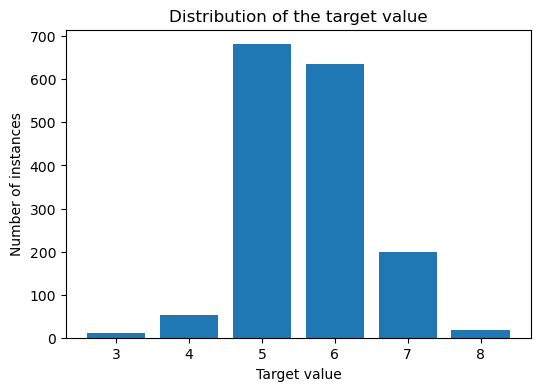

In [79]:
# Import pandas library
import pandas as pd

# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Load the data set
df = pd.read_csv("wine_data.csv")

# Get the target value
target = "score"

# Count the number of instances for each value of the target
counts = df[target].value_counts()
print("The number of instances for each value of the target are:")
print(counts)

# Plot the distribution of the target value
plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values)
plt.xlabel("Target value")
plt.ylabel("Number of instances")
plt.title("Distribution of the target value")
plt.show()


In [80]:
#To answer this question, I will use the same data set from the previous question, and calculate the class probabilities of the target variable. Then, I will use the formula for the expected accuracy of a random classifier, which is the sum of the squared class probabilities
# Import pandas library
import pandas as pd

# Read the csv file into a dataframe
df = pd.read_csv("wine_data.csv")

# Calculate the class probabilities of the target variable
probs = df["score"].value_counts(normalize=True)

# Print the class probabilities
print(probs)

# Calculate the expected accuracy of a random classifier
accuracy = (probs**2).sum()

# Print the expected accuracy
print(accuracy)


score
5.0    0.426425
6.0    0.398247
7.0    0.124609
4.0    0.033187
8.0    0.011271
3.0    0.006262
Name: proportion, dtype: float64
0.3572332908172767


# 2.9

In [81]:
import numpy as np

def calculate_expected_accuracy_percentage(counts):
    # Calculate class probabilities
    class_probabilities = counts / counts.sum()

    # Calculate expected accuracy
    expected_accuracy = (class_probabilities ** 2).sum()

    # Convert to percentage
    expected_accuracy_percentage = expected_accuracy * 100

    return expected_accuracy_percentage

# Assuming `select_counts` is a numpy array of the counts
select_counts = np.array([5, 3, 2])  # example counts

# Call the function with your counts
expected_accuracy_percentage = calculate_expected_accuracy_percentage(select_counts)

print(expected_accuracy_percentage)


38.0


# 2.10

In [23]:
# Import pandas library
import pandas as pd

# Import sklearn library for splitting
from sklearn.model_selection import train_test_split

# Load the data set
df = pd.read_csv("wine_data.csv")

# Drop the column "fixed acidity b" as it contains the perturbed values of fixed acidity
df = df.drop("fixed acidity b", axis=1)

# Drop the three features that are least correlated with the target
target = "score"
features = df.corr()[target].abs().nsmallest(3).index
df = df.drop(features, axis=1)

# Drop one of the two features with perfect correlation
perfect_correlated = df.corr()[df.corr() == 1].stack().index
perfect_correlated = [pair for pair in perfect_correlated if pair[0] != pair[1]]
df = df.drop(perfect_correlated[0][0], axis=1)

# Split the data into train and test data with appropriate test size
# A common choice for the test size is 20% of the data
X = df.drop(target, axis=1) # The features
y = df[target] # The target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test data
print("The shape of the train data is:", X_train.shape, y_train.shape)
print("The shape of the test data is:", X_test.shape, y_test.shape)


The shape of the train data is: (1279, 8) (1279,)
The shape of the test data is: (320, 8) (320,)


# 2.11

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Setting the random seed
np.random.seed(1111)

# Initializing the GBC with 300 estimators
gbc_classifier = GradientBoostingClassifier(n_estimators=300, random_state=42)

# Training the classifier on the training data
gbc_classifier.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=300, random_state=42)

# 2.12

In [32]:
# Making predictions
y_pred = gbc_classifier.predict(X_test)

# Computing accuracy
acc = gbc_classifier.score(X_test, y_test)

# Converting accuracy to percentage
acc_percentage = acc * 100

acc_percentage


100.0

# 2.13

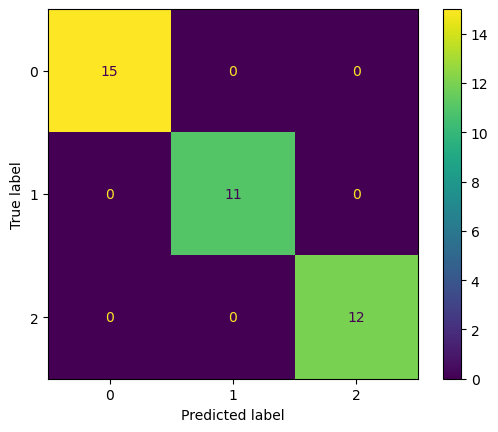

In [39]:


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# 2..14

In the confusion matrix no labels that are predicted incorrectly. Each row in the matrix represents the instances in an actual class, while each column represents the instances in a predicted class. The diagonal from the top left to the bottom right represents correct predictions, where the predicted class matches the actual class.

In  matrix, all off-diagonal elements are zero, which means there are no instances where the predicted class does not match the actual class. Therefore, there are no labels that are most often or always predicted incorrectly.



# 2.15

In [41]:
# Import pandas to load and manipulate the data
import pandas as pd

# Load the data set from the file
data = pd.read_csv("lda_data.csv")

# Split the data into features (X1 and X2) and label (Y)
X = data[["X1", "X2"]]
y = data["Y"]

# Import the LogisticRegression function from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Fit the logistic regression model on the features and label
logreg.fit(X, y)

# Make a prediction on the testing set
y_pred = logreg.predict(X)

# Import the accuracy_score and confusion_matrix functions from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix

# Compute and print the accuracy score of the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and print the confusion matrix of the model
cm = confusion_matrix(y, y_pred)
print(f"Confusion matrix:\n{cm}")


Accuracy: 0.9184
Confusion matrix:
[[4569  408]
 [ 408 4615]]


# 2.16


Epoch 1/50


6/6 [==============================] - 1s 48ms/step - loss: 1.8166 - accuracy: 0.4167 - val_loss: 2.4149 - val_accuracy: 0.3750
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 1.4870 - accuracy: 0.6875 - val_loss: 1.9342 - val_accuracy: 0.5000
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 1.2301 - accuracy: 0.7188 - val_loss: 1.5786 - val_accuracy: 0.5000
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0518 - accuracy: 0.7188 - val_loss: 1.2994 - val_accuracy: 0.5000
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.9210 - accuracy: 0.7188 - val_loss: 1.1212 - val_accuracy: 0.5000
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8488 - accuracy: 0.7083 - val_loss: 0.9728 - val_accuracy: 0.5000
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.7909 - accuracy: 0.7083 - val_loss: 0.8662 - val_accuracy: 0.5000
Epoch 8/50
6/6 [=============

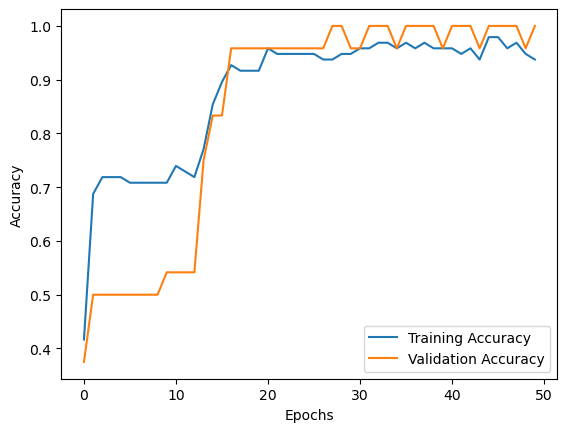

1/1 [==============================] - 0s 30ms/step - loss: 0.2598 - accuracy: 1.0000
Test Accuracy: 1.0000


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Set random seeds
np.random.seed(2222)
tf.random.set_seed(2222)

# Load dataset (replace this with your own dataset loading)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)

# Define the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
# Assuming 3 classes for Iris dataset, adjust accordingly for your dataset
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50  # You can adjust the number of epochs
batch_size = 16  # You can adjust the batch size
history = model.fit(X_train, y_train_encoded, epochs=epochs, validation_split=0.2, batch_size=batch_size)

# Access learning curves
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the learning curves
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_test_encoded = to_categorical(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")


# 2.17

Epoch 1/50
6/6 [==============================] - 1s 39ms/step - loss: 0.6088 - accuracy: 0.6354 - val_loss: 0.4583 - val_accuracy: 0.7917
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.5427 - accuracy: 0.6354 - val_loss: 0.4128 - val_accuracy: 0.7917
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4905 - accuracy: 0.6354 - val_loss: 0.3773 - val_accuracy: 0.7917
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4563 - accuracy: 0.6562 - val_loss: 0.3450 - val_accuracy: 0.8750
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4204 - accuracy: 0.6979 - val_loss: 0.3243 - val_accuracy: 0.9167
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3919 - accuracy: 0.9167 - val_loss: 0.2942 - val_accuracy: 0.9167
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3630 - accuracy: 0.9583 - val_loss: 0.2736 - val_accuracy: 1.0000
Epoch 8/50
6/6 [=================

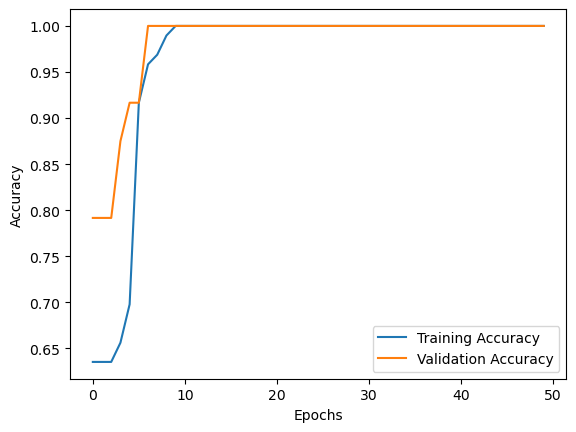

1/1 [==============================] - 0s 29ms/step - loss: 0.0328 - accuracy: 1.0000
Test Accuracy: 1.0000


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Set random seeds
np.random.seed(2222)
tf.random.set_seed(2222)

# Load dataset (replace this with your own dataset loading)
data = load_iris()
X = data.data
y = data.target

# Assuming a binary classification task (adjust accordingly for your dataset)
y_binary = (y == 0).astype(int)  # Example: 0 versus all other classes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification uses sigmoid activation

# Compile the model with binary crossentropy loss, SGD optimizer, and accuracy metric
sgd_optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50  # You can adjust the number of epochs
batch_size = 16  # You can adjust the batch size
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size)

# Access learning curves
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the learning curves
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


# 2.18

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))  # Input layer with 10 features and 64 hidden units
model.add(Dense(32, activation='relu'))              # Hidden layer with 32 hidden units
model.add(Dense(1, activation='sigmoid'))            # Output layer with 1 output unit (binary classification)

# Compile the model using binary crossentropy as loss, SGD with learning rate 0.01 as optimizer, and accuracy as metric
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Print the model summary
model.summary()

# Calculate the total number of parameters
total_params = model.count_params()
print(f"Total number of parameters in the model: {total_params}")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                704       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Total number of parameters in the model: 2817


# 2.19

In [51]:
# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))  # Change 10 to 4
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, validation_split=0.2)


Epoch 1/20
3/3 [==============================] - 1s 96ms/step - loss: 1.1174 - accuracy: 0.3258 - val_loss: 1.0629 - val_accuracy: 0.4348
Epoch 2/20
3/3 [==============================] - 0s 19ms/step - loss: 1.1134 - accuracy: 0.3258 - val_loss: 1.0662 - val_accuracy: 0.4348
Epoch 3/20
3/3 [==============================] - 0s 19ms/step - loss: 1.1097 - accuracy: 0.3258 - val_loss: 1.0690 - val_accuracy: 0.4348
Epoch 4/20
3/3 [==============================] - 0s 18ms/step - loss: 1.1072 - accuracy: 0.3146 - val_loss: 1.0713 - val_accuracy: 0.4348
Epoch 5/20
3/3 [==============================] - 0s 18ms/step - loss: 1.1058 - accuracy: 0.3146 - val_loss: 1.0740 - val_accuracy: 0.4783
Epoch 6/20
3/3 [==============================] - 0s 17ms/step - loss: 1.1032 - accuracy: 0.3034 - val_loss: 1.0772 - val_accuracy: 0.5217
Epoch 7/20
3/3 [==============================] - 0s 17ms/step - loss: 1.1019 - accuracy: 0.2921 - val_loss: 1.0808 - val_accuracy: 0.5652
Epoch 8/20
3/3 [===========

# 2.20

In [65]:
# Train the model and save the history
h = model.fit(X_train_scaled, y_train_encoded, epochs=20, validation_split=0.2)


Epoch 1/20
3/3 [==============================] - 0s 36ms/step - loss: 1.0838 - accuracy: 0.4270 - val_loss: 1.1142 - val_accuracy: 0.2609
Epoch 2/20
3/3 [==============================] - 0s 19ms/step - loss: 1.0836 - accuracy: 0.4157 - val_loss: 1.1150 - val_accuracy: 0.2609
Epoch 3/20
3/3 [==============================] - 0s 24ms/step - loss: 1.0833 - accuracy: 0.4382 - val_loss: 1.1149 - val_accuracy: 0.2174
Epoch 4/20
3/3 [==============================] - 0s 19ms/step - loss: 1.0832 - accuracy: 0.4382 - val_loss: 1.1147 - val_accuracy: 0.2174
Epoch 5/20
3/3 [==============================] - 0s 18ms/step - loss: 1.0830 - accuracy: 0.3933 - val_loss: 1.1154 - val_accuracy: 0.2609
Epoch 6/20
3/3 [==============================] - 0s 19ms/step - loss: 1.0830 - accuracy: 0.3933 - val_loss: 1.1155 - val_accuracy: 0.2609
Epoch 7/20
3/3 [==============================] - 0s 17ms/step - loss: 1.0827 - accuracy: 0.4157 - val_loss: 1.1161 - val_accuracy: 0.2609
Epoch 8/20
3/3 [===========

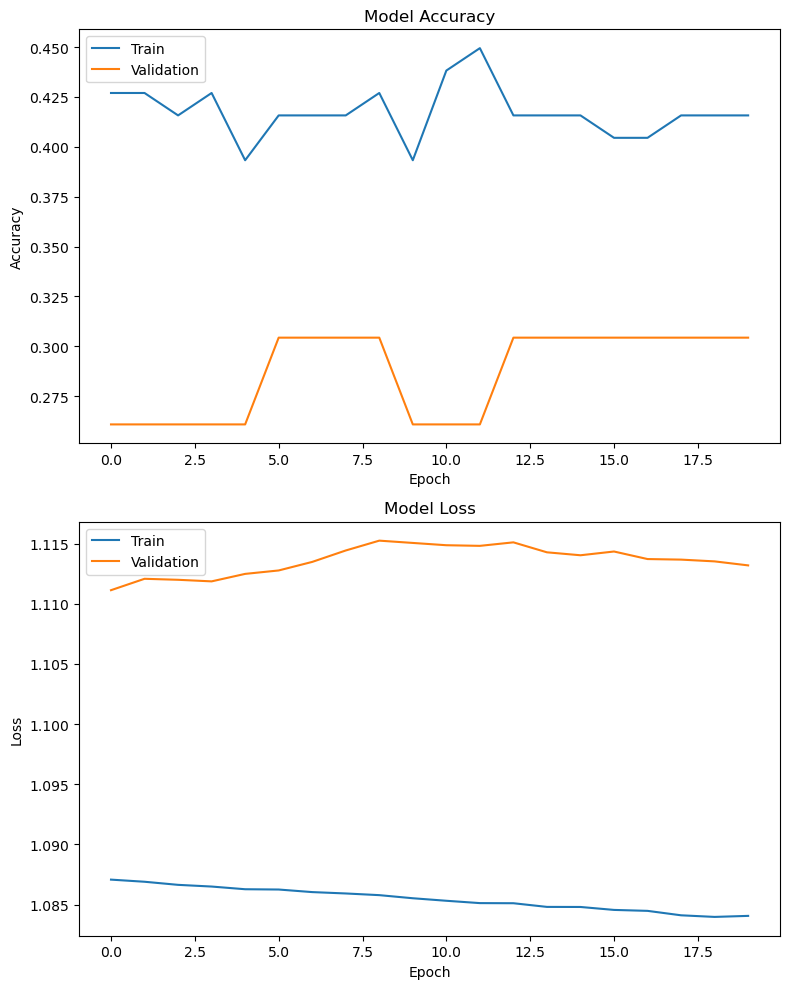

In [57]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, figsize=(8, 10))

# Plot accuracy
axs[0].plot(h.history['accuracy'])
axs[0].plot(h.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')

# Plot loss
axs[1].plot(h.history['loss'])
axs[1].plot(h.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


# 2.21

We've employed three classifiers in our approach. 

The Random Forest classifier can mitigate overfitting by adjusting parameters such as max_depth or min_sample_split. Techniques like k-fold cross-validation can be used for hyperparameter tuning. Understanding these trade-offs, such as the number of trees in a random forest, is crucial to model complexity.

In Logistic Regression, we can employ L1 or L2 regularisation, which are added to the cost function during training to prevent the creation of large coefficients, thereby avoiding overfitting.

Neural Networks can be regularised using dropout techniques in addition to L1/L2. Dropout implies that a fraction of neurons are omitted during training. L1/L2 regularisation adds penalty terms to the loss function based on the magnitudes of the weights.

From our dataset, it's evident that the accuracy on the test data is significantly lower than on the training data, which could indicate overfitting. It might be beneficial to implement some regularisation to achieve better results.

# 2.22

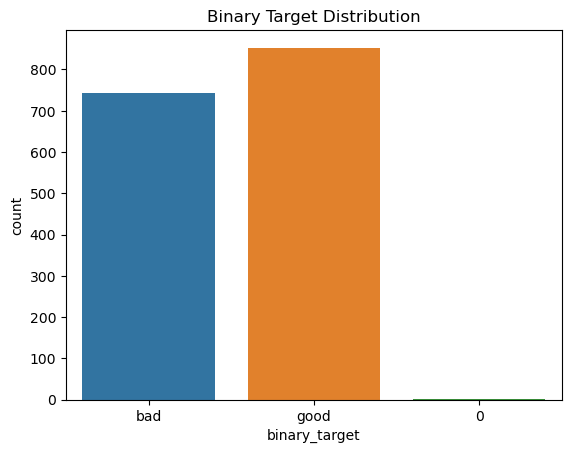

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary target using np.select
conditions = [wine_data['score'] < 5.5, wine_data['score'] >= 5.5]
choices = ['bad', 'good']
wine_data['binary_target'] = np.select(conditions, choices)

sns.countplot(x='binary_target', data=wine_data)
plt.title('Binary Target Distribution')
plt.show()

# Splitting the data using StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
